<h3>Виконав студент групи КН-23-1 Лимар Дмитро</h3>

__Завдання на самостійну роботу__:

* Для варіанта, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі

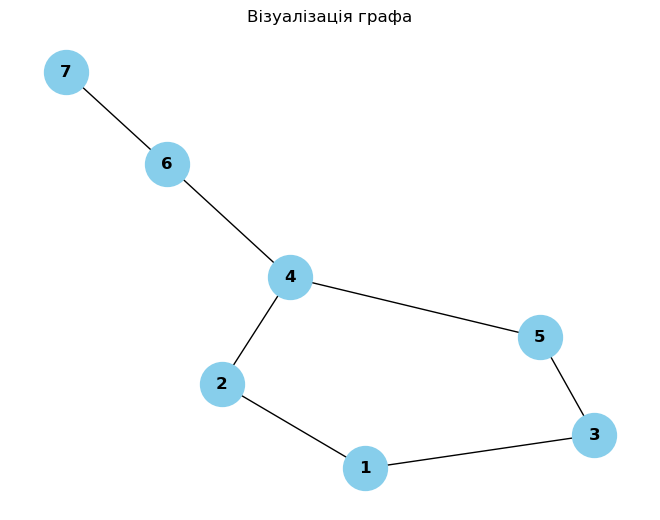

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (4, 6), (6,7)]

# Додаємо ребра до графа
G.add_edges_from(edges)

# Візуалізуємо граф
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Візуалізація графа")
plt.show()

* Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище

# Алгоритм Дейкстри

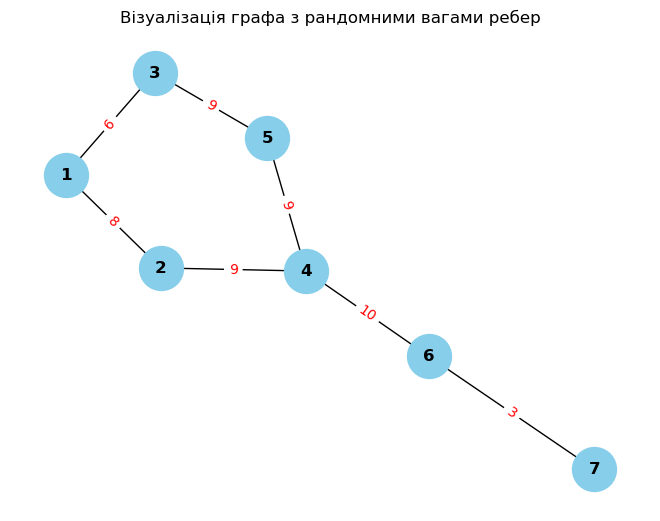

In [42]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Створюємо граф
G = nx.Graph()

# Додаємо ребра
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (4, 6), (6,7)]
G.add_edges_from(edges)

# Задаємо рандомні ваги ребер
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

# Візуалізуємо граф з вагами ребер
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Візуалізація графа з рандомними вагами ребер")
plt.show()


In [44]:
# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
length, path = nx.single_source_dijkstra(G, 1)

# Виводимо довжину найкоротшого шляху від вершини 1 до вершини 7
print(length[7])

# Виводимо всі довжини найкоротших шляхів від вершини 1 до всіх інших вершин
print(length)

# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
nx.single_source_dijkstra(G, source=1)

30
{1: 0, 3: 6, 2: 8, 5: 15, 4: 17, 6: 27, 7: 30}


({1: 0, 3: 6, 2: 8, 5: 15, 4: 17, 6: 27, 7: 30},
 {1: [1],
  2: [1, 2],
  3: [1, 3],
  5: [1, 3, 5],
  4: [1, 2, 4],
  6: [1, 2, 4, 6],
  7: [1, 2, 4, 6, 7]})

# Алгоритм Белмана-Форда

In [47]:
# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
length = nx.single_source_bellman_ford_path_length(G, 1)

# Виводимо довжину найкоротшого шляху від вершини 1 до вершини 7
print(length[7])

# Виводимо всі довжини найкоротших шляхів від вершини 1 до всіх інших вершин
print(length)

# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
nx.single_source_bellman_ford_path_length(G, source=1) 

30
{1: 0, 2: 8, 3: 6, 4: 17, 5: 15, 6: 27, 7: 30}


{1: 0, 2: 8, 3: 6, 4: 17, 5: 15, 6: 27, 7: 30}

# Пошук в глибину (DFS)

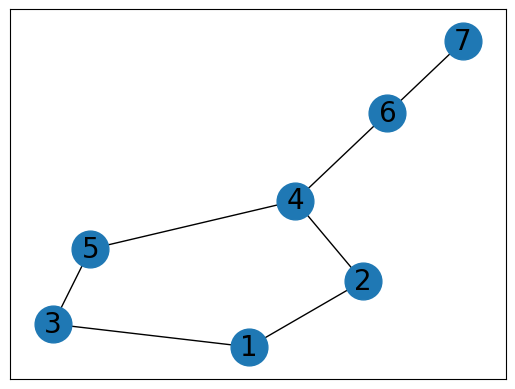

In [52]:
# Виклик magic-команди, яка автоматично відображає графіки у рядку
%matplotlib inline

# Імпорт необхідних бібліотек
import networkx as nx
import matplotlib.pyplot as plt

# Створення пустого графа
G = nx.Graph()

# Додавання вершин та ребер
G.add_nodes_from(['1', '2', '3', '4', '5', '6', '7'])
G.add_edges_from([('1', '2'), ('1', '3'), ('2', '4'), ('3', '5'), ('4', '5'), ('4', '6'), ('6','7')])

# Визначення позицій вершин для відображення графа
pos = nx.spring_layout(G)

# Візуалізація вершин та їх міток
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=G.edges())

# Показ графіка
plt.show()

In [54]:
# Функція dfs використовує алгоритм пошуку в глибину (DFS) для обходу графа.
# Починаючи з вершини start, вона відвідує всі вершини графа, до яких можна дійти з цієї вершини,
# та повертає список відвіданих вершин.
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()  # Створюємо пустий набір для збереження відвіданих вершин
    visited.add(start)  # Додаємо поточну вершину до відвіданих
    # Перебираємо всі сусідні вершини поточної вершини
    for next in set(graph.adj[start].keys()) - visited:
        # Рекурсивно викликаємо функцію dfs для наступної вершини
        dfs(graph, next, visited)
    return visited

# Викликаємо функцію dfs з графом G та початковою вершиною 'C'
dfs(G, '1')

# Функція dfs_paths також використовує алгоритм пошуку в глибину (DFS),
# але вона знаходить всі можливі шляхи з початкової вершини до цільової вершини.
# Параметр path використовується для зберігання поточного шляху.
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]  # Починаємо з початкової вершини
    if start == goal:
        yield path  # Якщо досягли цільової вершини, повертаємо шлях
    # Перебираємо всі сусідні вершини поточної вершини, які ще не відвідані
    for next in set(graph.adj[start].keys()) - set(path):
        # Рекурсивно викликаємо функцію dfs_paths для наступної вершини
        yield from dfs_paths(graph, next, goal, path + [next])

# Викликаємо функцію dfs_paths з графом G, початковою вершиною 'C' та цільовою вершиною 'F'
list(dfs_paths(G, '1', '7'))


[['1', '2', '4', '6', '7'], ['1', '3', '5', '4', '6', '7']]

# Контрольні запитання

1) Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

Граф – це математична структура, яка використовується для моделювання парних відносин між об'єктами. Приклади ситуацій: комп'ютерні мережі, дороги між містами, електричні мережі

2) Які головні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.

Основні види графів:

* Неорієнтований граф - вершини: точки, що представляють об'єкти, ребра: лінії, що з'єднують пари вершин, без напрямку.

* Орієнтований граф - вершини: точки, що представляють об'єкти, ребра: лінії, що з'єднують пари вершин і мають напрямок.

* Зважений граф - може бути як орієнтованим, так і неорієнтованим, ребра: лінії, що з'єднують вершини, мають ваги, що представляють значення.

3) Як можна подати граф у пам’яті комп’ютера? Опишіть структури даних, які використовуються для зберігання графів.

Основні структури даних для зберігання графів включають матриці суміжності, списки суміжності та списки ребер.

* матриця суміжності – це квадратна матриця $n × n$, $n -$ кількість вершин у графі. Елементи матриці вказують на наявність ребра між парами вершин.

* список суміжності складається з масиву списків. Кожен елемент масиву відповідає вершині і містить список всіх суміжних вершин.

* список ребер – це простий список всіх ребер графа. Кожне ребро представляється парою вершин.

4) Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.

Алгоритм пошуку в ширину BFS використовується для обходу або пошуку елементів у графі. Він починає з заданої стартової вершини і досліджує всі сусідні вершини на поточному рівні перед переходом до вершин наступного рівня.

Приклади ситуацій, де застосовується алгоритм BFS

* Знаходження найкоротшого шляху в неваговому графі. Приклад: Знаходження мінімальної кількості кроків, необхідних для досягнення цілі в лабіринті.

* Перевірка зв'язності графа. Приклад: Перевірка, чи можна дістатися до будь-якого вебсайту з іншого в мережі Інтернет.

* Пошук найближчого ресурсу або об'єкта. Приклад: Знаходження найближчої заправної станції від поточного місця в дорожній мережі.

5) Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Надайте приклади задач, де використовується DFS.

Алгоритм пошуку в глибину DFS використовується для обходу або пошуку елементів у графі. Він починає з заданої стартової вершини і досліджує кожен гілку графа якомога глибше перед поверненням назад.

Відмінності між DFS і BFS: 

* DFS: Використовує стек для обходу графа, досліджуючи глибину кожної гілки перед поверненням назад.

* BFS: Використовує чергу для обходу графа, досліджуючи всі сусідні вершини на поточному рівні перед переходом до наступного рівня.

* DFS: Відвідує вершини якомога глибше, перш ніж повертатися.

* BFS: Відвідує всі сусідні вершини на поточному рівні перед переходом до вершин наступного рівня.

* DFS: Використовує стек, що може бути реалізовано рекурсивно.

* BFS: Використовує чергу.

* DFS: Краще підходить для завдань, де потрібно досліджувати всі можливі шляхи, наприклад, для пошуку шляхів у лабіринтах, аналізу зв'язності, пошуку компонентів сильної зв'язності.

* BFS: Краще підходить для завдань, де потрібно знайти найкоротший шлях у неваговому графі.

6) Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

Алгоритм Дейкстри призначений для знаходження найкоротших шляхів від початкової вершини до всіх інших вершин у зваженому графі з невід'ємними вагами ребер. Він використовує пріоритетну чергу для вибору вершини з найменшою поточною відстанню та поступово оновлює найкоротші відстані до інших вершин.

Умови для успішної роботи алгоритму: 

* Ваги ребер повинні бути невід'ємними

* Граф повинен бути зваженим, тобто кожне ребро повинно мати вагу. Ця вага використовується для обчислення найкоротших шляхів.